In [83]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [84]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [85]:
x_train.shape

(60000, 28, 28)

In [86]:
len(x_train)

60000

In [87]:
len(x_test)

10000

In [88]:
x_train[0].shape

(28, 28)

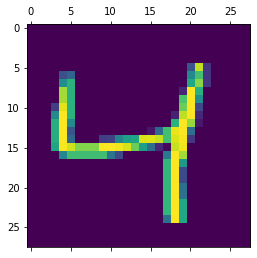

In [89]:
plt.matshow(x_train[2])

In [90]:
y_train[2]

4

In [91]:
x_train = x_train / 255
x_test = x_test / 255

In [92]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [93]:
x_test_flattened.shape

(10000, 784)

In [94]:
x_train_flattened.shape

(60000, 784)

In [95]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']    
)
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 839us/step - loss: 0.4709 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 2s 825us/step - loss: 0.3041 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 2s 834us/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 807us/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 873us/step - loss: 0.2664 - accuracy: 0.9256


In [96]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 708us/step - loss: 0.2697 - accuracy: 0.9235


[0.2697492837905884, 0.9235000014305115]

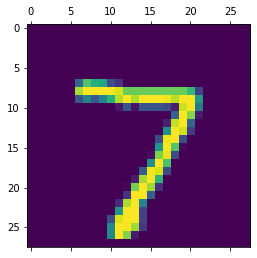

In [97]:
plt.matshow(x_test[0])

In [98]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 696us/step


In [99]:
y_predicted[0]

array([3.0886143e-02, 5.2849714e-07, 4.4871580e-02, 9.4969863e-01,
       3.1487981e-03, 1.1847997e-01, 1.5537275e-06, 9.9985522e-01,
       1.0604693e-01, 6.7698073e-01], dtype=float32)

In [100]:
np.argmax(y_predicted[0])

7

In [101]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [102]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    6,    7,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   9,   12,  904,   19,    8,    3,   13,   12,   48,    4],
       [   4,    1,   15,  920,    0,   27,    2,   14,   19,    8],
       [   2,    1,    4,    1,  920,    0,    9,    5,   10,   30],
       [   8,    3,    2,   31,   10,  778,   14,   10,   29,    7],
       [   9,    3,    6,    2,    7,   19,  907,    2,    3,    0],
       [   1,    7,   20,    5,    5,    0,    0,  966,    2,   22],
       [   7,   14,    5,   21,    9,   31,    9,   13,  859,    6],
       [  11,    7,    1,   10,   30,    8,    0,   36,    4,  902]])>

Text(69.0, 0.5, 'Truth')

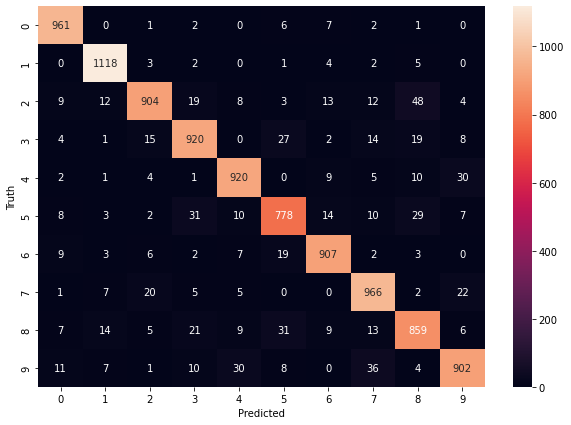

In [103]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# IF WE ADD A HIDDEN LAYER

In [104]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']    
)
model.fit(x_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2714 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1226 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0845 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0651 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0517 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0402 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0271 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0242 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

In [78]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 941us/step - loss: 0.0835 - accuracy: 0.9740


[0.0834888368844986, 0.9739999771118164]

Text(69.0, 0.5, 'Truth')

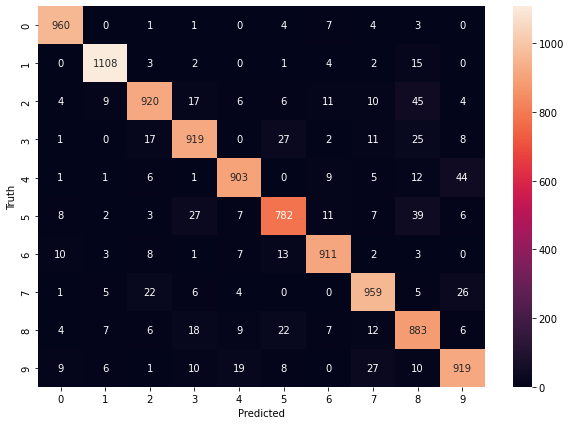

In [79]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# IF U DONT WANNA USE FLATTEN

In [80]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']    
)
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2697 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1201 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0858 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0657 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0528 - accuracy: 0.9842


In [82]:
arraawdawda = [3,4]